In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

Loading data 'Auto-mpg dataset' from Kaggle. showing what it contains.
Then, I'll focues on five features - year, displacement, horsepower, weight, and acceleration
to predict (target) mpg.
* categorial variable is: year
* continuous variables are: displacement, horsepower, weight, and acceleration

In [2]:
# from https://www.kaggle.com/uciml/autompg-dataset/version/3
car_df = pd.read_csv('auto-mpg.csv')

In [3]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# narrow down the data frame 
limited_car_df = car_df[['mpg', 'horsepower', 'weight', 'displacement', 'acceleration', 'cylinders', 'origin']]

# converet the non int type data to NaN
limited_car_df = limited_car_df.apply(pd.to_numeric, errors='coerce')

# check the amount of rows of 'n/a' values
print("\n\nThe total number of rows with unknow values: {}".format(len(limited_car_df) - len(limited_car_df.dropna())))

# since it's not too many, drop rows with bad data.
# That will be the feature data frame
featured_car_df = limited_car_df.dropna()

# look at the new table
featured_car_df.head()



The total number of rows with unknow values: 6


,mpg,horsepower,weight,displacement,acceleration,cylinders,origin
0,18.0,130.0,3504,307.0,12.0,8,1
1,15.0,165.0,3693,350.0,11.5,8,1
2,18.0,150.0,3436,318.0,11.0,8,1
3,16.0,150.0,3433,304.0,12.0,8,1
4,17.0,140.0,3449,302.0,10.5,8,1


C:\Users\padii\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


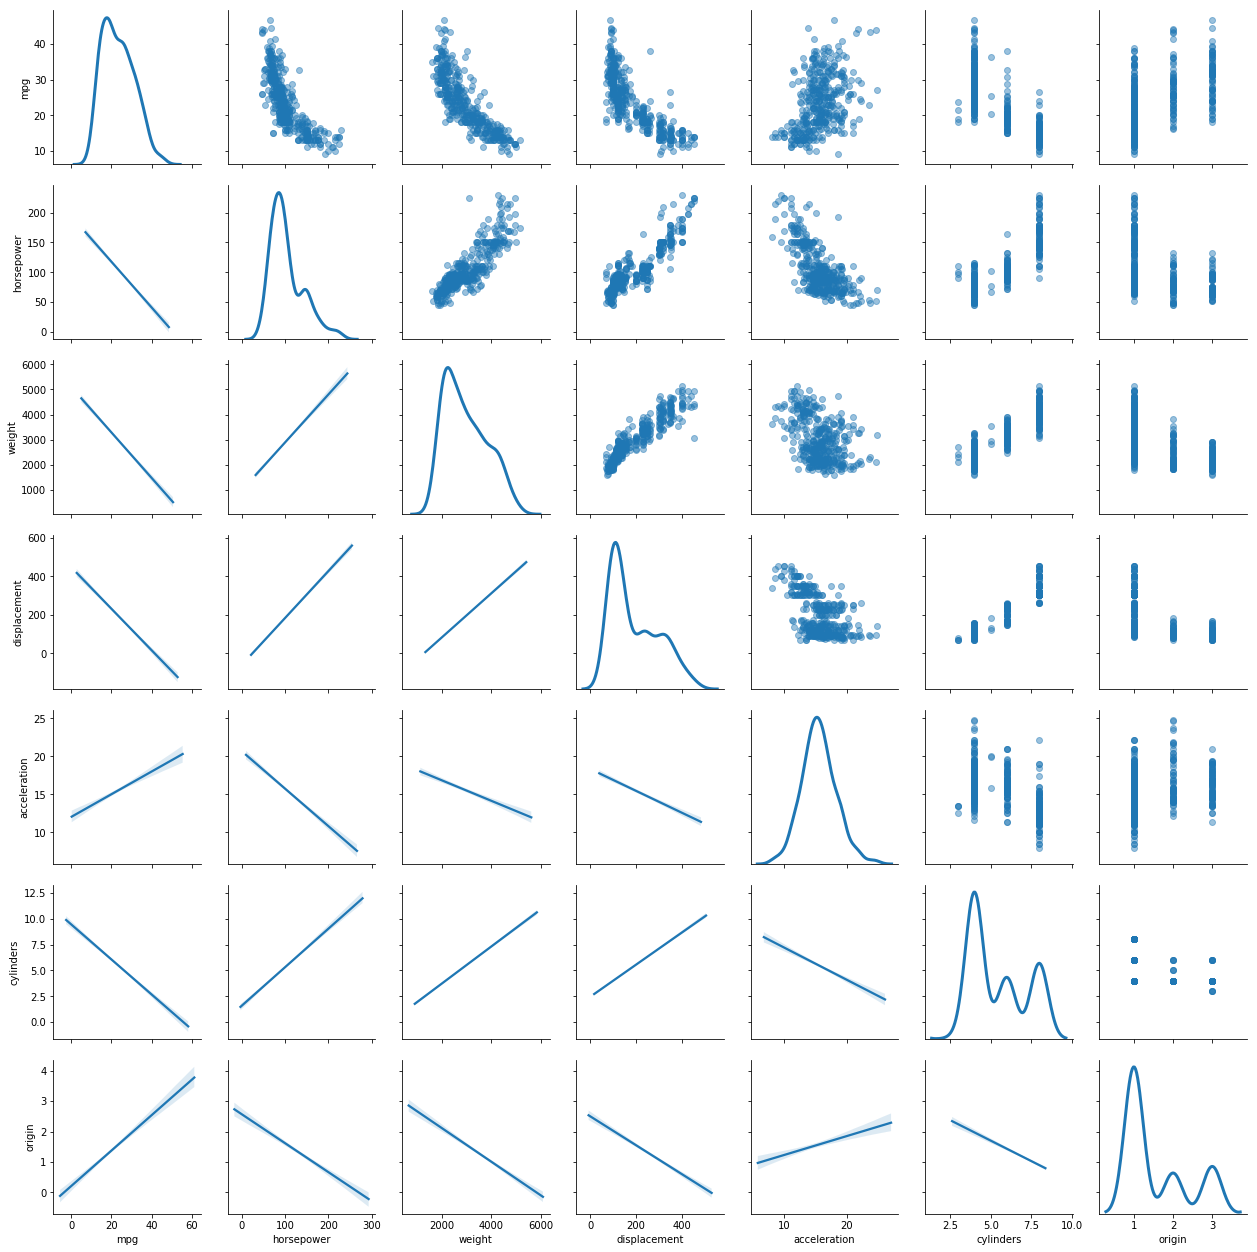

In [5]:
# Declare making a scatterplot matrix.
g = sns.PairGrid(featured_car_df, diag_sharey=False)

# Upper right - Scatterplot.
g.map_upper(plt.scatter, alpha=.45)

# Lower left - Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)

plt.show()

In [6]:
# See the correlation between the variables with numbers (between -1 to 1)
correlation = featured_car_df.corr()
print(correlation)

                   mpg  horsepower    weight  displacement  acceleration  \
mpg           1.000000   -0.778427 -0.832244     -0.805127      0.423329   
horsepower   -0.778427    1.000000  0.864538      0.897257     -0.689196   
weight       -0.832244    0.864538  1.000000      0.932994     -0.416839   
displacement -0.805127    0.897257  0.932994      1.000000     -0.543800   
acceleration  0.423329   -0.689196 -0.416839     -0.543800      1.000000   
cylinders    -0.777618    0.842983  0.897527      0.950823     -0.504683   
origin        0.565209   -0.455171 -0.585005     -0.614535      0.212746   

              cylinders    origin  
mpg           -0.777618  0.565209  
horsepower     0.842983 -0.455171  
weight         0.897527 -0.585005  
displacement   0.950823 -0.614535  
acceleration  -0.504683  0.212746  
cylinders      1.000000 -0.568932  
origin        -0.568932  1.000000  


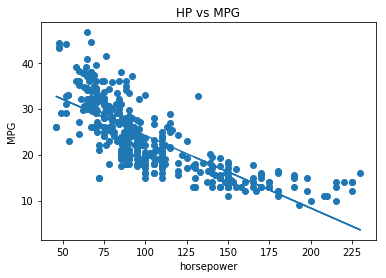

The R squared value is: 0.606


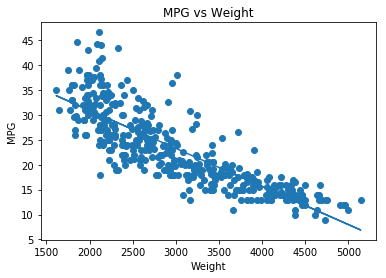

The R squared value is: 0.693


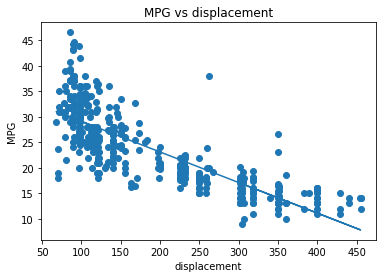

The R squared value is: 0.648


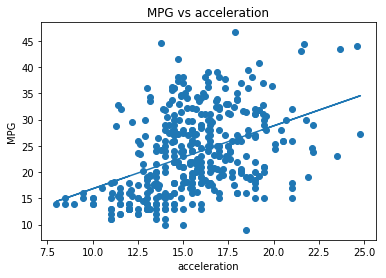

The R squared value is: 0.179


In [7]:
# Create just the scatterplot each graph vs mpg with a regression line

# plot the scatter graph
plt.title("HP vs MPG")
plt.scatter(featured_car_df["horsepower"], featured_car_df["mpg"])
plt.xlabel("horsepower")
plt.ylabel("MPG")
# linear regressin
linear = np.polyfit(featured_car_df.horsepower, featured_car_df.mpg, 1)
plt.plot(featured_car_df.horsepower, np.polyval(linear, featured_car_df.horsepower))
plt.show()
print("The R squared value is:", round((correlation.loc["mpg"].horsepower)**2, 3))

plt.title("MPG vs Weight")
plt.scatter(featured_car_df["weight"], featured_car_df["mpg"])
plt.xlabel("Weight")
plt.ylabel("MPG")
linear = np.polyfit(featured_car_df.weight, featured_car_df.mpg, 1)
plt.plot(featured_car_df.weight, np.polyval(linear, featured_car_df.weight))
plt.show()
print("The R squared value is:", round((correlation.loc["mpg"].weight)**2, 3))

plt.title("MPG vs displacement")
plt.scatter(featured_car_df["displacement"], featured_car_df["mpg"])
plt.xlabel("displacement")
plt.ylabel("MPG")
linear = np.polyfit(featured_car_df.displacement, featured_car_df.mpg, 1)
plt.plot(featured_car_df.displacement, np.polyval(linear, featured_car_df.displacement))
plt.show()
print("The R squared value is:", round((correlation.loc["mpg"].displacement)**2, 3))

plt.title("MPG vs acceleration")
plt.scatter(featured_car_df["acceleration"], featured_car_df["mpg"])
plt.xlabel("acceleration")
plt.ylabel("MPG")
linear = np.polyfit(featured_car_df.acceleration, featured_car_df.mpg, 1)
plt.plot(featured_car_df.acceleration, np.polyval(linear, featured_car_df.acceleration))
plt.show()
print("The R squared value is:", round((correlation.loc["mpg"].acceleration)**2, 3))

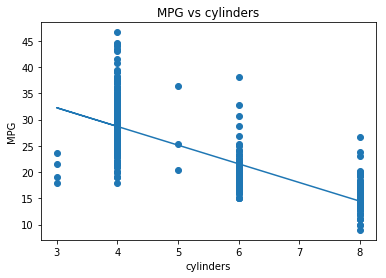

The R squared value is: 0.605


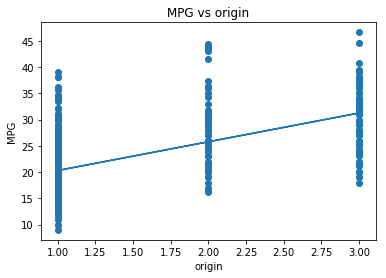

The R squared value is: 0.319


In [8]:
# categorical variables

plt.title("MPG vs cylinders")
plt.scatter(featured_car_df["cylinders"], featured_car_df["mpg"])
plt.xlabel("cylinders")
plt.ylabel("MPG")
linear = np.polyfit(featured_car_df.cylinders, featured_car_df.mpg, 1)
plt.plot(featured_car_df.cylinders, np.polyval(linear, featured_car_df.cylinders))
plt.show()
print("The R squared value is:", round((correlation.loc["mpg"].cylinders)**2, 3))

plt.title("MPG vs origin")
plt.scatter(featured_car_df["origin"], featured_car_df["mpg"])
plt.xlabel("origin")
plt.ylabel("MPG")
linear = np.polyfit(featured_car_df.origin, featured_car_df.mpg, 1)
plt.plot(featured_car_df.origin, np.polyval(linear, featured_car_df.origin))
plt.show()
print("The R squared value is:", round((correlation.loc["mpg"].origin)**2, 3))

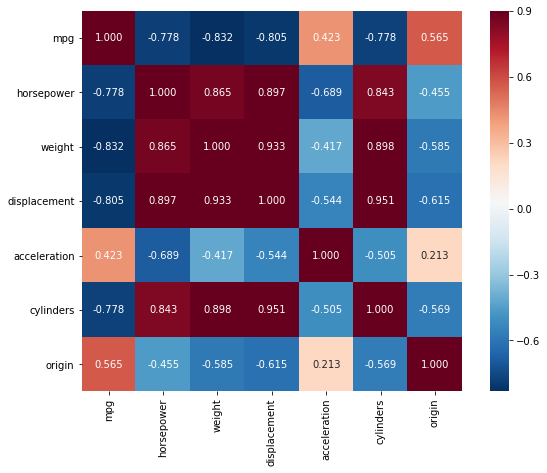

In [9]:
# Can also use a heatmap.
f, ax = plt.subplots(figsize=(10, 7))

# Draw the heatmap using seaborn.
sns.heatmap(correlation, vmax=.9, square=True, cmap="RdBu_r", annot=True, fmt='.3f')

plt.show()

# Additional variables part 1 - manual
weight per cylinder,
displacement per cylinder,
acceleration per cylinder,

In [10]:
# Using DataFrame.insert() to add a column 
featured_car_df.insert((len(featured_car_df.columns) - 1), "weight_per_cylinder", featured_car_df["weight"] / featured_car_df["cylinders"], False)
featured_car_df.insert((len(featured_car_df.columns) - 1), "displacement_per_cylinder", featured_car_df["displacement"] / featured_car_df["cylinders"], False)
featured_car_df.insert((len(featured_car_df.columns) - 1), "acceleration_per_cylinder", featured_car_df["acceleration"] / featured_car_df["cylinders"], False)

featured_car_df.head()

#featured_car_df['weight_per_cylinder'] = featured_car_df.apply(lambda row: row['weight'] / row['cylanders'], axis=1)

,mpg,horsepower,weight,displacement,acceleration,cylinders,weight_per_cylinder,displacement_per_cylinder,acceleration_per_cylinder,origin
0,18.0,130.0,3504,307.0,12.0,8,438.000,38.375,1.5000,1
1,15.0,165.0,3693,350.0,11.5,8,461.625,43.750,1.4375,1
2,18.0,150.0,3436,318.0,11.0,8,429.500,39.750,1.3750,1
3,16.0,150.0,3433,304.0,12.0,8,429.125,38.000,1.5000,1
4,17.0,140.0,3449,302.0,10.5,8,431.125,37.750,1.3125,1


                                mpg  horsepower    weight  displacement  \
mpg                        1.000000   -0.778427 -0.832244     -0.805127   
horsepower                -0.778427    1.000000  0.864538      0.897257   
weight                    -0.832244    0.864538  1.000000      0.932994   
displacement              -0.805127    0.897257  0.932994      1.000000   
acceleration               0.423329   -0.689196 -0.416839     -0.543800   
cylinders                 -0.777618    0.842983  0.897527      0.950823   
weight_per_cylinder       -0.016004   -0.076967  0.054060     -0.194397   
displacement_per_cylinder -0.772536    0.813038  0.873676      0.921289   
acceleration_per_cylinder  0.735900   -0.850083 -0.803335     -0.885554   
origin                     0.565209   -0.455171 -0.585005     -0.614535   

                           acceleration  cylinders  weight_per_cylinder  \
mpg                            0.423329  -0.777618            -0.016004   
horsepower              

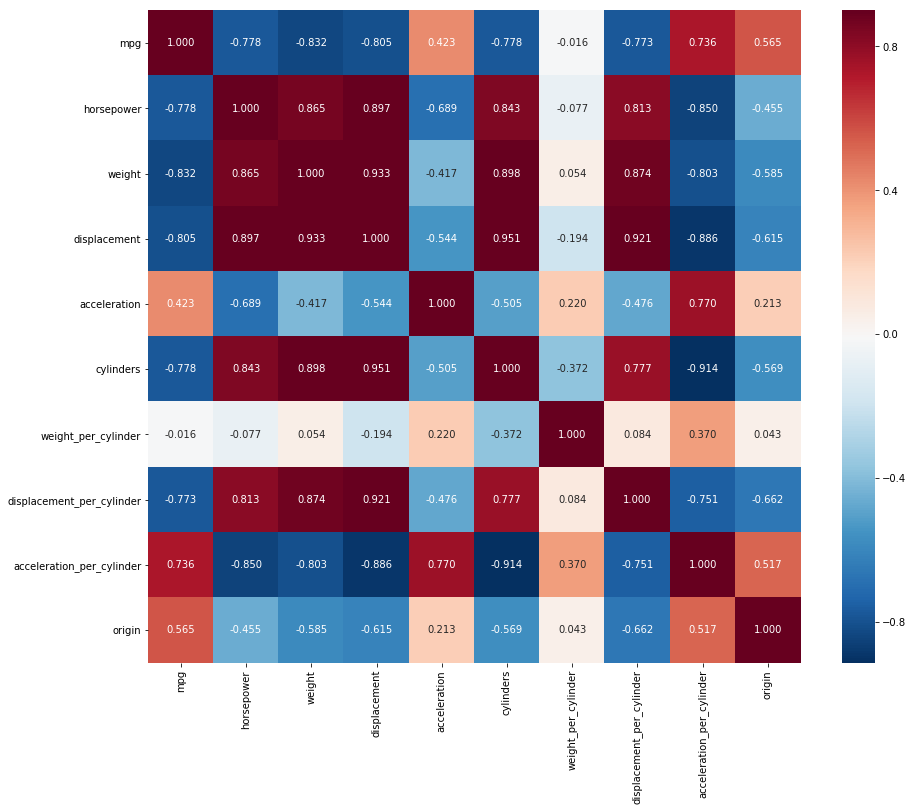

In [11]:
correlation2 = featured_car_df.corr()
print(correlation2)

# Can also use a heatmap.
f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap using seaborn.
sns.heatmap(correlation2, vmax=.9, square=True, cmap="RdBu_r", annot=True, fmt='.3f')

plt.show()

# Additional variables part 2 - primitive 
square, cube, mean mpg per culinder, median mpg per culinder

In [12]:
# means = featured_car_df[['weight','cylinders', 'displacement', 'acceleration']].mean(axis=0)
# stds = featured_car_df[['weight','cylinders', 'displacement', 'acceleration']].std(axis=0)b
# featured_car_df['ave_weight_per_cylinders'] = ((featured_car_df[['weight', 'cylinders']] - means) / stds).mean(axis=1)

In [13]:
# adding square and cube feature

featured_car_df.insert((len(featured_car_df.columns)), "squared_horsepower", featured_car_df["horsepower"] * featured_car_df["horsepower"], False)

featured_car_df.insert((len(featured_car_df.columns)), "squared_weight", featured_car_df["weight"] * featured_car_df["weight"], False)

featured_car_df.insert((len(featured_car_df.columns)), "squared_acceleration", featured_car_df["acceleration"] * featured_car_df["acceleration"], False)

featured_car_df.insert((len(featured_car_df.columns)), "cube_horsepower", featured_car_df["horsepower"] ** 3, False)

featured_car_df.insert((len(featured_car_df.columns)), "cube_weight", featured_car_df["weight"] ** 3, False)

featured_car_df.insert((len(featured_car_df.columns)), "cube_acceleration", featured_car_df["acceleration"] ** 3, False)

In [14]:
featured_car_df.head()

,mpg,horsepower,weight,displacement,acceleration,cylinders,weight_per_cylinder,displacement_per_cylinder,acceleration_per_cylinder,origin,squared_horsepower,squared_weight,squared_acceleration,cube_horsepower,cube_weight,cube_acceleration
0,18.0,130.0,3504,307.0,12.0,8,438.000,38.375,1.5000,1,16900.0,12278016,144.00,2197000.0,43022168064,1728.000
1,15.0,165.0,3693,350.0,11.5,8,461.625,43.750,1.4375,1,27225.0,13638249,132.25,4492125.0,50366053557,1520.875
2,18.0,150.0,3436,318.0,11.0,8,429.500,39.750,1.3750,1,22500.0,11806096,121.00,3375000.0,40565745856,1331.000
3,16.0,150.0,3433,304.0,12.0,8,429.125,38.000,1.5000,1,22500.0,11785489,144.00,3375000.0,40459583737,1728.000
4,17.0,140.0,3449,302.0,10.5,8,431.125,37.750,1.3125,1,19600.0,11895601,110.25,2744000.0,41027927849,1157.625


In [15]:
# add mean mpg per cylinder

means = featured_car_df[['weight','cylinders', 'displacement', 'acceleration', 'mpg']].mean(axis=0)
stds = featured_car_df[['weight','cylinders', 'displacement', 'acceleration']].std(axis=0)

# featured_car_df['ave_weight_per_cylinders'] = ((featured_car_df[['weight', 'cylinders']] - means) / stds).mean(axis=1)
featured_car_df.insert((len(featured_car_df.columns)), "ave_weight_per_cylinders", (featured_car_df["weight"] - means[0]) / featured_car_df["cylinders"], False)

featured_car_df.insert((len(featured_car_df.columns)), "ave_mpg_per_cylinders", (featured_car_df["mpg"] - means[4]) / featured_car_df["cylinders"], False)

featured_car_df.insert((len(featured_car_df.columns)), "ave_acceleration_per_cylinders", (featured_car_df["acceleration"] - means[3]) / featured_car_df["cylinders"], False)


In [16]:
featured_car_df.head()

,mpg,horsepower,weight,displacement,acceleration,cylinders,weight_per_cylinder,displacement_per_cylinder,acceleration_per_cylinder,origin,squared_horsepower,squared_weight,squared_acceleration,cube_horsepower,cube_weight,cube_acceleration,ave_weight_per_cylinders,ave_mpg_per_cylinders,ave_acceleration_per_cylinders
0,18.0,130.0,3504,307.0,12.0,8,438.000,38.375,1.5000,1,16900.0,12278016,144.00,2197000.0,43022168064,1728.000,65.801977,-0.68074,-0.442666
1,15.0,165.0,3693,350.0,11.5,8,461.625,43.750,1.4375,1,27225.0,13638249,132.25,4492125.0,50366053557,1520.875,89.426977,-1.05574,-0.505166
2,18.0,150.0,3436,318.0,11.0,8,429.500,39.750,1.3750,1,22500.0,11806096,121.00,3375000.0,40565745856,1331.000,57.301977,-0.68074,-0.567666
3,16.0,150.0,3433,304.0,12.0,8,429.125,38.000,1.5000,1,22500.0,11785489,144.00,3375000.0,40459583737,1728.000,56.926977,-0.93074,-0.442666
4,17.0,140.0,3449,302.0,10.5,8,431.125,37.750,1.3125,1,19600.0,11895601,110.25,2744000.0,41027927849,1157.625,58.926977,-0.80574,-0.630166


In [17]:
# show the heat map with all the new features 
correlation3 = featured_car_df.corr()
print(correlation3)


                                     mpg  horsepower    weight  displacement  \
mpg                             1.000000   -0.778427 -0.832244     -0.805127   
horsepower                     -0.778427    1.000000  0.864538      0.897257   
weight                         -0.832244    0.864538  1.000000      0.932994   
displacement                   -0.805127    0.897257  0.932994      1.000000   
acceleration                    0.423329   -0.689196 -0.416839     -0.543800   
cylinders                      -0.777618    0.842983  0.897527      0.950823   
weight_per_cylinder            -0.016004   -0.076967  0.054060     -0.194397   
displacement_per_cylinder      -0.772536    0.813038  0.873676      0.921289   
acceleration_per_cylinder       0.735900   -0.850083 -0.803335     -0.885554   
origin                          0.565209   -0.455171 -0.585005     -0.614535   
squared_horsepower             -0.712297    0.982807  0.815723      0.868595   
squared_weight                 -0.806682

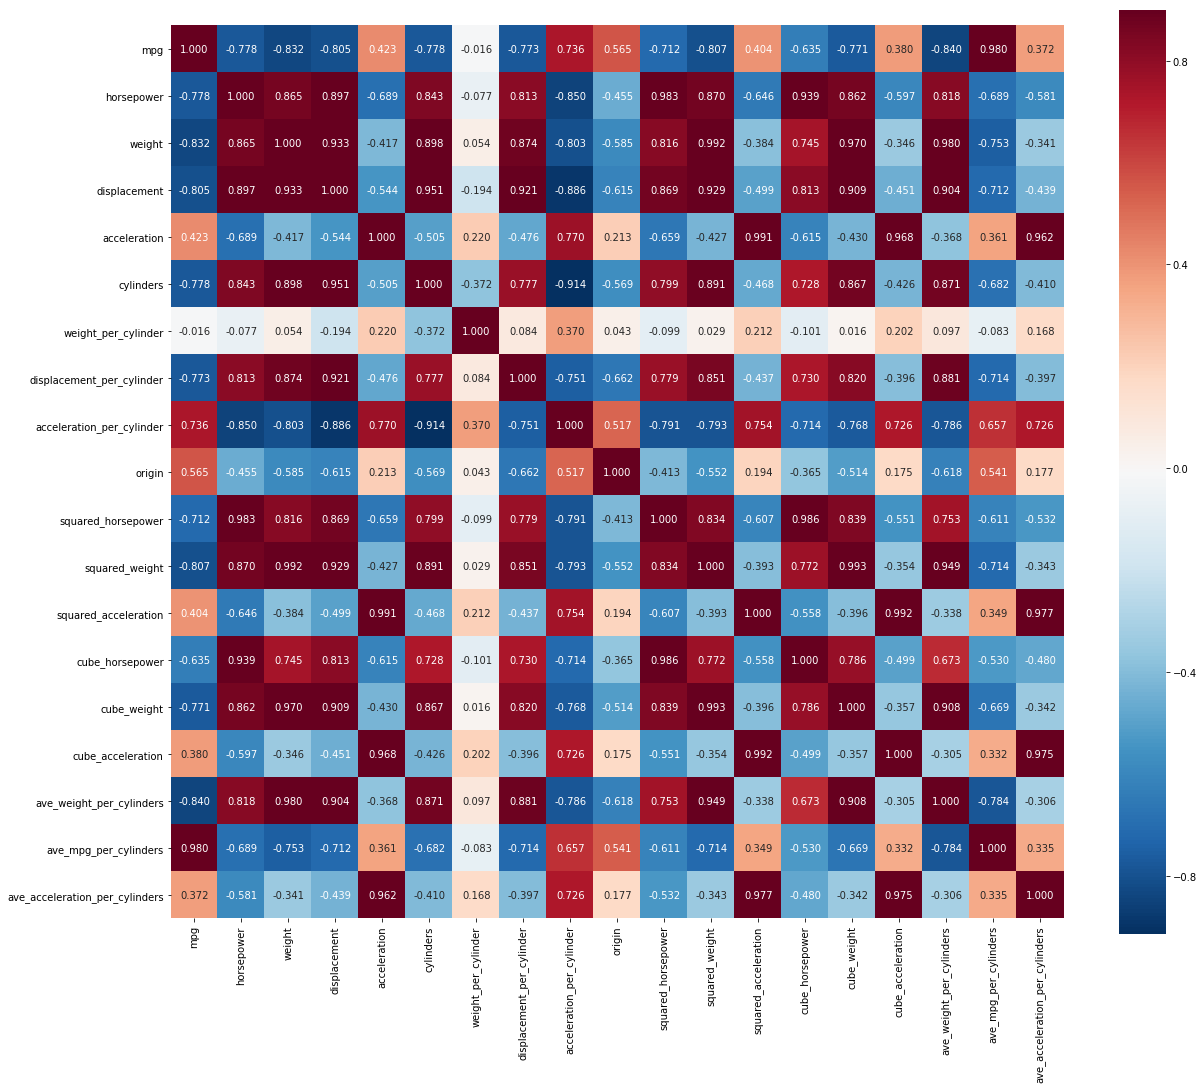

In [18]:
f, ax = plt.subplots(figsize=(20, 17))

# Draw the heatmap using seaborn.
sns.heatmap(correlation3, vmax=.9, square=True, cmap="RdBu_r", annot=True, fmt='.3f')

plt.show()

In [19]:
# create a new standardized DF 
standardized_df = pd.DataFrame()

standardized_df['mpg_z'] = (featured_car_df['mpg'] - featured_car_df['mpg'].mean()) / featured_car_df['mpg'].std()
standardized_df['horsepower_z'] = (featured_car_df['horsepower'] - featured_car_df['horsepower'].mean()) / featured_car_df['horsepower'].std()
standardized_df['weight_z'] = (featured_car_df['weight'] - featured_car_df['weight'].mean()) / featured_car_df['weight'].std()
standardized_df['displacement_z'] = (featured_car_df['displacement'] - featured_car_df['displacement'].mean()) / featured_car_df['displacement'].std()
standardized_df['acceleration_z'] = (featured_car_df['acceleration'] - featured_car_df['acceleration'].mean()) / featured_car_df['acceleration'].std()
standardized_df['cylinders_Z'] = (featured_car_df['cylinders'] - featured_car_df['cylinders'].mean()) / featured_car_df['cylinders'].std()
standardized_df['weight_per_cylinder_z'] = (featured_car_df['weight_per_cylinder'] - featured_car_df['weight_per_cylinder'].mean()) / featured_car_df['weight_per_cylinder'].std()
standardized_df['displacement_per_cylinder_z'] = (featured_car_df['displacement_per_cylinder'] - featured_car_df['displacement_per_cylinder'].mean()) / featured_car_df['displacement_per_cylinder'].std()
standardized_df['acceleration_per_cylinder_z'] = (featured_car_df['acceleration_per_cylinder'] - featured_car_df['acceleration_per_cylinder'].mean()) / featured_car_df['acceleration_per_cylinder'].std()
standardized_df['origin_z'] = (featured_car_df['origin'] - featured_car_df['origin'].mean()) / featured_car_df['origin'].std()
standardized_df['squared_horsepower_z'] = (featured_car_df['squared_horsepower'] - featured_car_df['squared_horsepower'].mean()) / featured_car_df['squared_horsepower'].std()
standardized_df['squared_weight_z'] = (featured_car_df['squared_weight'] - featured_car_df['squared_weight'].mean()) / featured_car_df['squared_weight'].std()
standardized_df['squared_acceleration_z'] = (featured_car_df['squared_acceleration'] - featured_car_df['squared_acceleration'].mean()) / featured_car_df['squared_acceleration'].std()
standardized_df['cube_horsepower_z'] = (featured_car_df['cube_horsepower'] - featured_car_df['cube_horsepower'].mean()) / featured_car_df['cube_horsepower'].std()
standardized_df['cube_weight_z'] = (featured_car_df['cube_weight'] - featured_car_df['cube_weight'].mean()) / featured_car_df['cube_weight'].std()
standardized_df['cube_acceleration_z'] = (featured_car_df['cube_acceleration'] - featured_car_df['cube_acceleration'].mean()) / featured_car_df['cube_acceleration'].std()
standardized_df['ave_weight_per_cylinders_z'] = (featured_car_df['ave_weight_per_cylinders'] - featured_car_df['ave_weight_per_cylinders'].mean()) / featured_car_df['ave_weight_per_cylinders'].std()
standardized_df['ave_mpg_per_cylinders_z'] = (featured_car_df['ave_mpg_per_cylinders'] - featured_car_df['ave_mpg_per_cylinders'].mean()) / featured_car_df['ave_mpg_per_cylinders'].std()
standardized_df['ave_acceleration_per_cylinders_z'] = (featured_car_df['ave_acceleration_per_cylinders'] - featured_car_df['ave_acceleration_per_cylinders'].mean()) / featured_car_df['ave_acceleration_per_cylinders'].std()


standardized_df.head()


,mpg_z,horsepower_z,weight_z,displacement_z,acceleration_z,cylinders_Z,weight_per_cylinder_z,displacement_per_cylinder_z,acceleration_per_cylinder_z,origin_z,squared_horsepower_z,squared_weight_z,squared_acceleration_z,cube_horsepower_z,cube_weight_z,cube_acceleration_z,ave_weight_per_cylinders_z,ave_mpg_per_cylinders_z,ave_acceleration_per_cylinders_z
0,-0.697747,0.663285,0.619748,1.075915,-1.283618,1.482053,-1.415328,0.568550,-1.414266,-0.715726,0.459392,0.491757,-1.184827,0.253453,0.351604,-1.061940,0.696333,-0.641980,-0.943420
1,-1.082115,1.572585,0.842258,1.486832,-1.464852,1.482053,-1.126086,1.185869,-1.466969,-0.715726,1.511486,0.740202,-1.317258,1.346573,0.612994,-1.154133,0.849148,-0.878777,-1.058608
2,-0.697747,1.182885,0.539692,1.181033,-1.646086,1.482053,-1.519394,0.726469,-1.519672,-0.715726,1.030019,0.405561,-1.444053,0.814510,0.264173,-1.238649,0.641353,-0.641980,-1.173796
3,-0.953992,1.182885,0.536160,1.047246,-1.283618,1.482053,-1.523985,0.525481,-1.414266,-0.715726,1.030019,0.401797,-1.184827,0.814510,0.260394,-1.061940,0.638927,-0.799845,-0.943420
4,-0.825870,0.923085,0.554997,1.028134,-1.827320,1.482053,-1.499499,0.496768,-1.572376,-0.715726,0.734516,0.421909,-1.565213,0.513977,0.280623,-1.315820,0.651864,-0.720912,-1.288984


Next, I need to choose five features (columns) to keep.
From the above heat map, I'll take the five columns which have the highest values (absolute value).

                                mpg_z  ave_weight_per_cylinders_z  weight_z  \
mpg_z                        1.000000                   -0.839505 -0.832244   
ave_weight_per_cylinders_z  -0.839505                    1.000000  0.979946   
weight_z                    -0.832244                    0.979946  1.000000   
horsepower_z                -0.778427                    0.818040  0.864538   
displacement_z              -0.805127                    0.903615  0.932994   
acceleration_per_cylinder_z  0.735900                   -0.785692 -0.803335   

                             horsepower_z  displacement_z  \
mpg_z                           -0.778427       -0.805127   
ave_weight_per_cylinders_z       0.818040        0.903615   
weight_z                         0.864538        0.932994   
horsepower_z                     1.000000        0.897257   
displacement_z                   0.897257        1.000000   
acceleration_per_cylinder_z     -0.850083       -0.885554   

                  

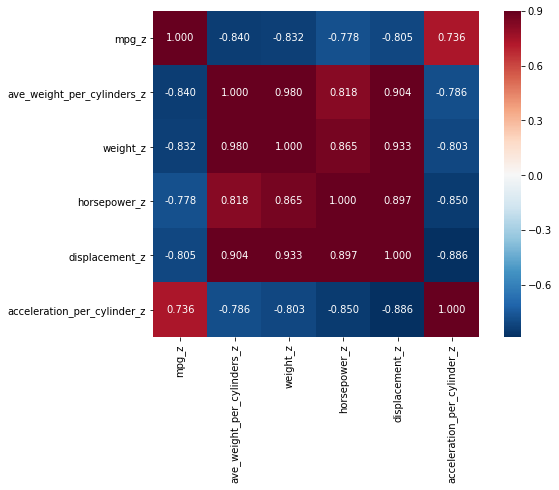

The R squared value of mpg_z and ave_weight_per_cylinders_z is: 0.705

The R squared value of mpg_z and weight_z is: 0.693

The R squared value of mpg_z and horsepower_z is: 0.606

The R squared value of mpg_z and displacement_z is: 0.648

The R squared value of mpg_z and acceleration_per_cylinder_z is: 0.542


In [20]:
five_featured_df = standardized_df[['mpg_z', 'ave_weight_per_cylinders_z', 'weight_z', 'horsepower_z', 'displacement_z', 
                                    'acceleration_per_cylinder_z']]

# show the heat map with all the new features 
correlation4 = five_featured_df.corr()
print(correlation4)
f, ax = plt.subplots(figsize=(9, 6))

# Draw the heatmap using seaborn.
sns.heatmap(correlation4, vmax=.9, square=True, cmap="RdBu_r", annot=True, fmt='.3f')

plt.show()

print("The R squared value of mpg_z and ave_weight_per_cylinders_z is:", round((correlation4.loc["mpg_z"].ave_weight_per_cylinders_z)**2, 3))

print("\nThe R squared value of mpg_z and weight_z is:", round((correlation4.loc["mpg_z"].weight_z)**2, 3))

print("\nThe R squared value of mpg_z and horsepower_z is:", round((correlation4.loc["mpg_z"].horsepower_z)**2, 3))

print("\nThe R squared value of mpg_z and displacement_z is:", round((correlation4.loc["mpg_z"].displacement_z)**2, 3))

print("\nThe R squared value of mpg_z and acceleration_per_cylinder_z is:", round((correlation4.loc["mpg_z"].acceleration_per_cylinder_z)**2, 3))

# Additional variables part 3 - automated 
TBD